# Survey Geometry

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
from matplotlib.ticker import AutoMinorLocator

from pipeline import harmony
from harmonia.mapper import SphericalFKPCatalogue
from harmonia.surveyor import generate_mask_from_map, generate_selection_by_cut

plt.style.use(harmony)

## BOSS DR12 CMASS North

In [3]:
mask_map = hp.read_map(
    repo_root/"storage"/"processed"/"survey_specifications"/
    "mask_map-(source=random0_BOSS_DR12v5_CMASS_North,nside=32).fits",
    dtype=float
)

NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


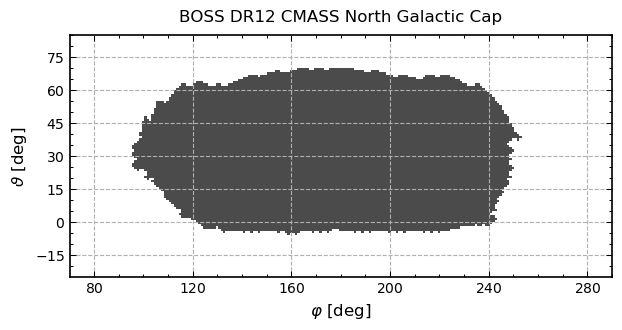

In [4]:
imag = hp.visufunc.cartview(
    map=mask_map, xsize=360, lonra=[0, 360],
    return_projected_map=True
)

plt.close('all')

fig = plt.figure(figsize=(7., 3.2), dpi=100)

ax = fig.add_subplot(111)

ax.imshow(imag, cmap='Greys', vmin=0., vmax=1.3, extent=(0, 360, -90, 90), zorder=0.5)

ax.set_xticks(np.r_[np.arange(0, 360, 40), 360])
ax.set_yticks(np.r_[np.arange(-90, 90, 15), 90])
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.set_xlim(70, 290)
ax.set_ylim(-25, 85)
ax.set_xlabel(r"$\varphi$ [$\deg$]")
ax.set_ylabel(r"$\vartheta$ [$\deg$]")
ax.grid(axis='both', ls='--')
ax.set_title("BOSS DR12 CMASS North Galactic Cap", pad=10)

fig.savefig(repo_root/"notebooks"/"publications"/"survey_mask.pdf")

## Catalogue projection

In [5]:
mask = generate_mask_from_map(
    'cartesian', 
    mask_map_file=repo_root/"storage"/"processed"/"survey_specifications"/
        "mask_map-(source=random0_BOSS_DR12v5_CMASS_North,nside=32).fits"
)

selection = generate_selection_by_cut(100., 500.)

In [6]:
catalogue = SphericalFKPCatalogue(
    1000./2,
    source_file=repo_root/"storage"/"external"/"simulations"/"halos-(NG=0.,z=1.)-cut_2-1.txt",
    source_kwargs={
        'headings': ["x", "y", "z", "vx", "vy", "vz", "mass"],
        'mean_density': 4.75e-5,
        'boxsize': 1000.,
        'offset': False,
    },
    contrast=50.,
    mask=mask,
    selection=selection,
    random_seed=42,
    apply_selection_as_veto=True
)

[2020-06-27 18:32:25 (+0:00:02) INFO] Extra arguments to FileType: ('/home/mikew/Documents/Concordia/storage/external/simulations/halos-(NG=0.,z=1.)-cut_2-1.txt', ['x', 'y', 'z', 'vx', 'vy', 'vz', 'mass']) {}


[2020-06-27 18:32:28 (+0:00:05) INFO] Chunk 0 ~ 4194304 / 47486 
[2020-06-27 18:32:29 (+0:00:05) INFO] painted 4729 out of 47486 objects to mesh
[2020-06-27 18:32:29 (+0:00:05) INFO] painted 4729 out of 47486 objects to mesh
[2020-06-27 18:32:29 (+0:00:05) INFO] mean particles per cell is 3.52338e-05
[2020-06-27 18:32:29 (+0:00:05) INFO] sum is 4729 
[2020-06-27 18:32:29 (+0:00:06) INFO] normalized the convention to 1 + delta


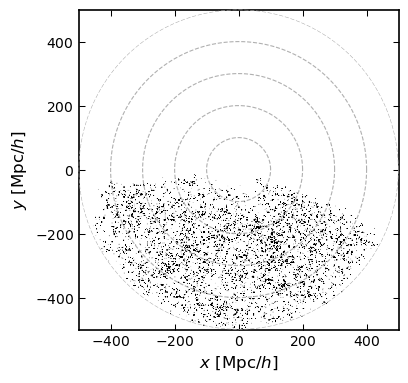

In [7]:
data_mesh = catalogue.data_catalogue.to_mesh(
    Nmesh=512, resampler='tsc', compensated=True
)

fig = plt.figure(figsize=(3.2, 3.2), dpi=100)

canvas = [0.1, 0.1, 1., 1.]

ax = fig.add_axes(canvas, aspect='equal')

ax.imshow(
    data_mesh.preview(axes=[0, 1]), extent=[-500., 500., -500., 500.],
    cmap='Greys', vmax=10000, aspect='equal'
)

polar_ax = fig.add_axes(canvas, polar=True, frameon=False)
polar_ax.grid(axis='x', b=False)
polar_ax.grid(axis='y', linestyle='--')
polar_ax.set_xticklabels([])
polar_ax.set_yticklabels([])

ax.set_xlabel(r"$x$ [Mpc/$h$]");
ax.set_ylabel(r"$y$ [Mpc/$h$]");